# **Objetivo: criar uma rede neural simples usando Keras para uma tarefa de classificação binária**

 # **Importação dos Dados e Processamento**


O conjunto de dados que será utilizado aqui é: "**Pima Indians Diabetes Dataset**". Ele pode ser baixado de: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

Este é um problema de classificação binária (2 classes). No conjunto de dados existem 768 observações com 8 variáveis de entrada e 1 variável de saída.

Os nomes das variáveis são os seguintes:

**1. Número de vezes grávida.**

**2. Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose.**

**3. Pressão arterial diastólica (mm Hg).**

**4. Espessura da prega cutânea do tríceps (mm).**

**5. Insulina sérica em 2 horas (mu U/ml).**

**6. Índice de massa corporal (peso em kg/(altura em m)^2).**

**7. Função pedigree para diabetes.**

**8. Idade (anos).**

**9. Variável de classe (0 ou 1).**

---
Importe as bibliotecas necessárias

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


---
Importe e visualize detalhes dos dados usando os comandos `np.loadtext('nome do arquivo', delimiter=',')` e `np.shape(...)`

In [ ]:
df = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', delimiter=',')
np.shape(df)

(768, 9)

---
Crie vetores `X_data` e `Y_data` para separar os 8 features, que são as entradas, e a única saída

In [ ]:
X_data, Y_data = df[:,0:8], df[:,8]

---
Separe os dados de treino e de teste usando o comando `train_test_split()`

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)

---
Verifique a dimensão do conjunto de treino e teste

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((514, 8), (514,), (254, 8), (254,))

# **Construa o Modelo**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy


In [ ]:
#Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
Crie o seu modelo

In [ ]:
model = Sequential()

---
Adicione as camadas: lembrando que a primeira camada recebe como entrada um vetor no $\mathbb{R}^8$.

In [ ]:
# PR : No se define en el modelo. Los datos de
#entrada deben escalarse previamente al rango
#especificado por PR

# S : Número de neuronas (units=S)

# TF : Función de Transferencia, usar 'tanh'
#para equivalente a 'hardlims'

# LF : Función de aprendizaje, usar
#optimizer='sgd' y loss='hinge' para equivalente
#as 'learnp'


model.add(Dense(units=8, input_dim=8,
activation='tanh', kernel_initializer='zeros',
bias_initializer='zeros'))

#adicionando camadas ocultas

model.add(Dense(16, input_dim=8, activation='relu'))  # Aumentando o número de neurônios
model.add(Dense(12, activation='relu'))              # Camada extra
model.add(Dense(8, activation='relu'))               # Camada extra
model.add(Dense(1, activation='sigmoid'))

# Output layer for binary classification
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Este código adiciona uma camada densamente conectada (Dense) ao seu modelo sequencial:

*   **`model.add(...)`**: Este comando adiciona uma camada ao modelo.
*   **`Dense(...)`**: Especifica que a camada a ser adicionada é uma camada densamente conectada, onde cada neurônio nesta camada está conectado a todos os neurônios da camada anterior.
*   **`units=5`**: Define o número de neurônios nesta camada. Neste caso, são 5 neurônios.
*   **`input_dim=8`**: Especifica o número de entradas para esta camada. Como esta é a primeira camada oculta e os dados de entrada têm 8 features, `input_dim` é definido como 8.
*   **`activation=TF`**: Define a função de ativação para os neurônios nesta camada. A função de ativação determina a saída de cada neurônio. Neste caso, a função de ativação é definida pela variável `TF`, que foi definida anteriormente como `'tanh'`.
*   **`kernel_initializer='zeros'`**: Define como os pesos (kernels) da camada serão inicializados. Neste caso, todos os pesos são inicializados com zeros.
*   **`bias_initializer='zeros'`**: Define como os vieses (biases) da camada serão inicializados. Neste caso, todos os vieses são inicializados com zeros.

---
Compile o modelo escolhendo a função de perda e o otimizador.

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.005),
    metrics = [BinaryAccuracy()]
)

# **Treine e Teste**

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, Y_test),
)


Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - binary_accuracy: 0.3833 - loss: 0.7090 - val_binary_accuracy: 0.6614 - val_loss: 0.6866
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.6907 - loss: 0.6792 - val_binary_accuracy: 0.6614 - val_loss: 0.6649
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6541 - loss: 0.6648 - val_binary_accuracy: 0.6614 - val_loss: 0.6554
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6457 - loss: 0.6587 - val_binary_accuracy: 0.6614 - val_loss: 0.6490
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.6384 - loss: 0.6575 - val_binary_accuracy: 0.6614 - val_loss: 0.6458
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6359 - loss: 0.6569 - val_binary_accuracy: 0.6614 - val_loss: 0.6437
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6387 - loss: 0.6547 - val_binary_accuracy: 0.6614 - val_loss: 0.6421
Epoch 8/2

---
Avalie a precisão usando o comando `model.evaluate()`

In [ ]:
loss, acurracy = model.evaluate(X_test, Y_test)
print(f'Acurácia: {acurracy}')
print(f'Loss: {loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6572 - loss: 0.6431 
Acurácia: 0.6614173054695129
Loss: 0.6406126618385315


Como ficou o resultado? Será que dá pra melhorar?

---
Crie uma pessoa imaginária com um vetor, por exemplo, na forma `np.array([[2,148,72,35,0,33.6,0.627,25]])` e use o comando `model.predict()` para verificar se essa pessoa é classificada com ou sem diabetes.

In [ ]:
Joao = np.array([[2,148,72,35,0,33.6,0.627,25]])

normalizado_joao = scaler.transform(Joao)

predicao = model.predict(Joao)

print(predicao[0])

if predicao[0] > 0.5:
    print("A pessoa tem diabetes.")
else:
    print("A pessoa não tem diabetes.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[0.3539784]
A pessoa não tem diabetes.


1ºPasso: Foi normal, sem ajuste de parâmetros


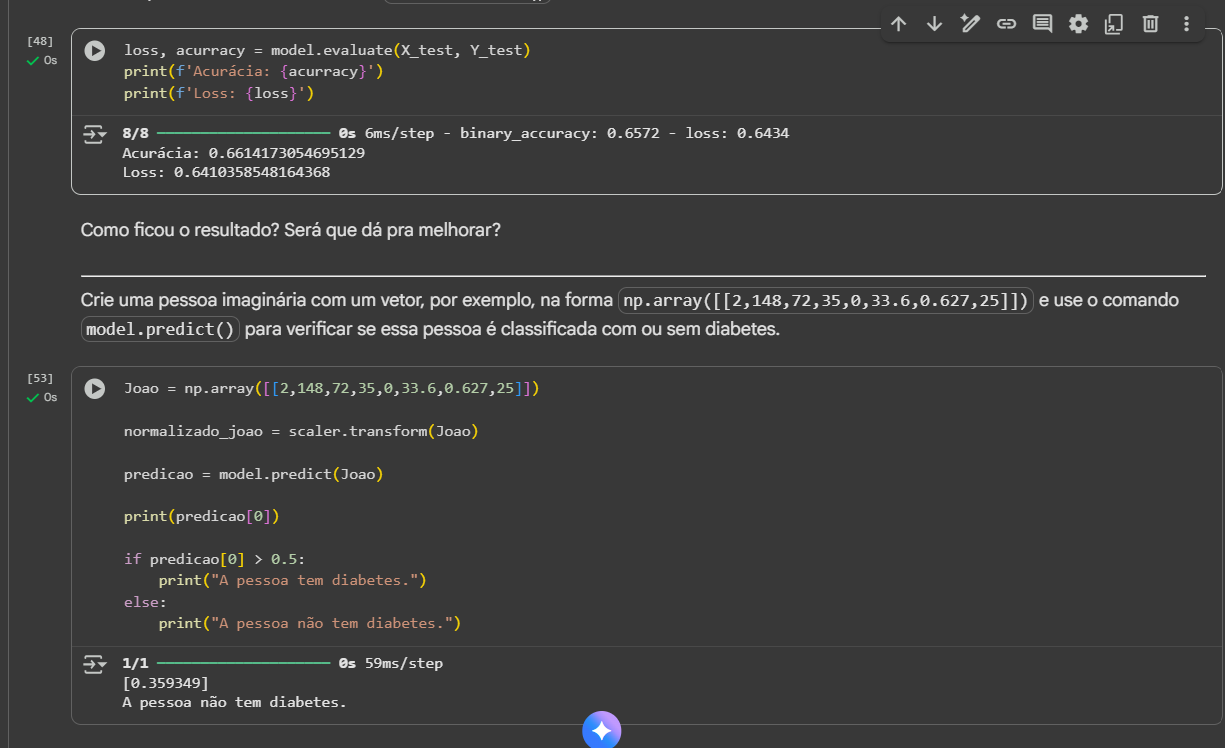



2°Passo: Adição de mais camadas
Acurácia ainda a mesma


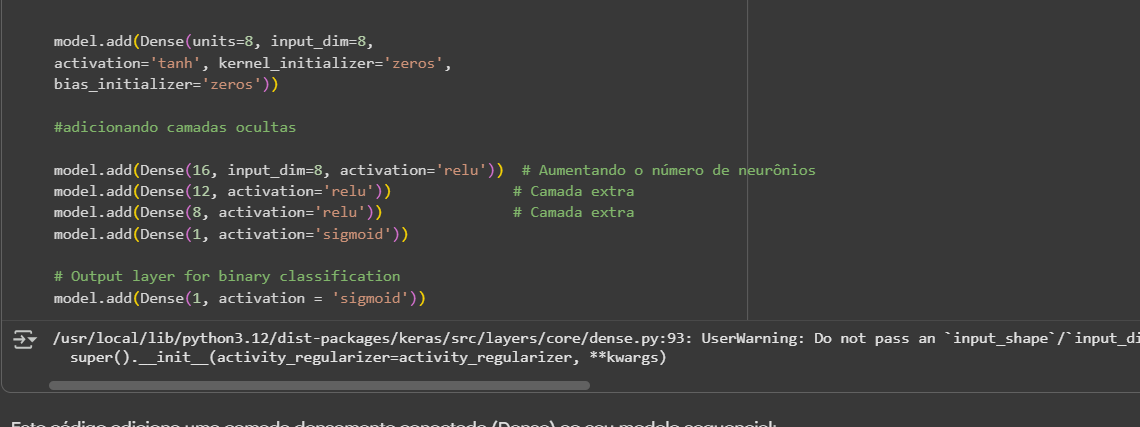


3°Passo: Aumento na taxa de aprendizado ADAM, tamanho do lote aumentou de 10 para 16 e epocas de 100 para 200

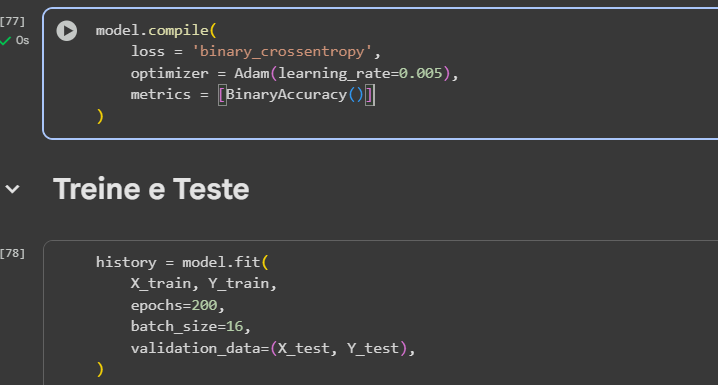